### Linear Regression

In [ ]:
# ingore harmful warnings
from warnings import filterwarnings
filterwarnings('ignore')

### Step 1  data ingestion

In [2]:
import pandas as pd
df = pd.read_csv("50_Startups.csv")
df.head()

,RND,ADMIN,MKT,STATE,PROFIT
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


### Step 2 - perform basic data quality check

In [5]:
df.isnull().sum()

RND       0
ADMIN     0
MKT       0
STATE     0
PROFIT    0
dtype: int64

In [6]:
df.duplicated().sum()

np.int64(0)

### Step 3 - Performaing visualization

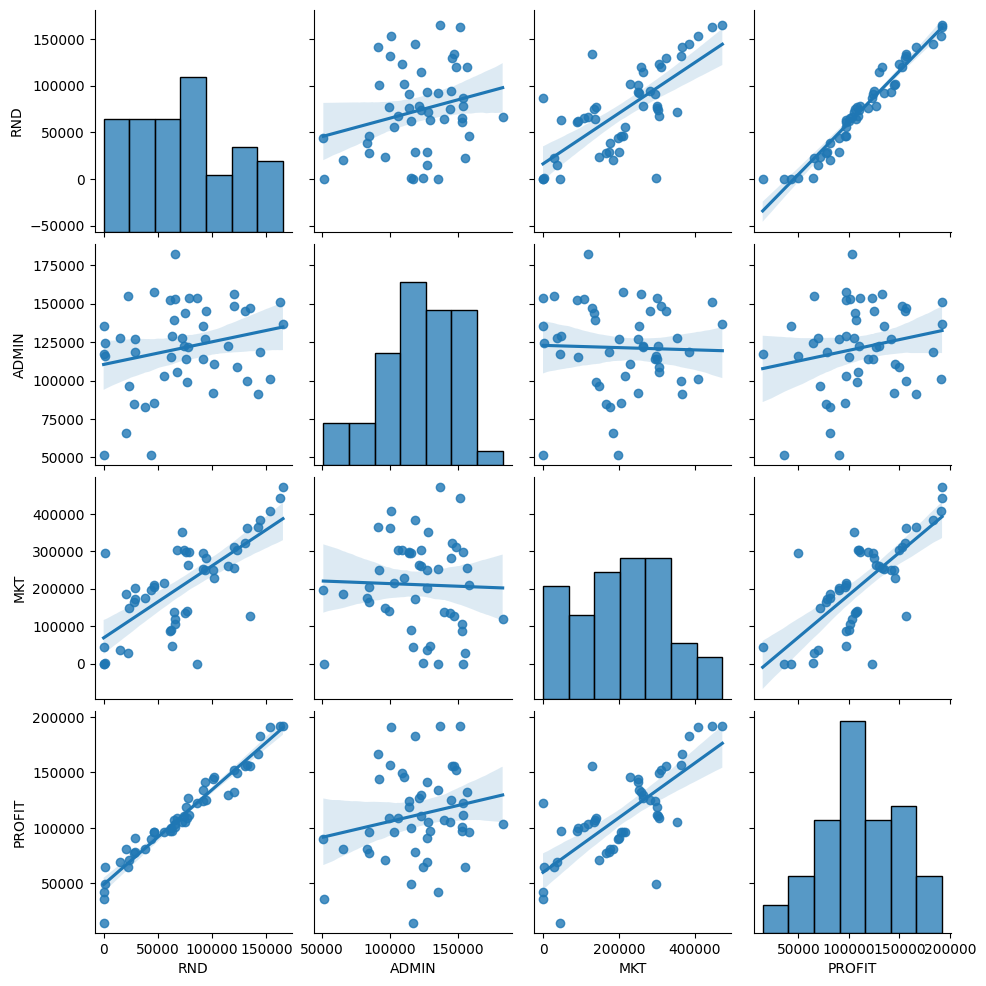

In [8]:
import seaborn as sns
sns.pairplot(df,kind="reg")

In [9]:
df.corr(numeric_only=True)

,RND,ADMIN,MKT,PROFIT
RND,1.000000,0.241955,0.724248,0.972900
ADMIN,0.241955,1.000000,-0.032154,0.200717
MKT,0.724248,-0.032154,1.000000,0.747766
PROFIT,0.972900,0.200717,0.747766,1.000000


### Prifit ~ RND
### Profit = b0 + b1*RND
### target - profit,Predictor - RND

### Step 4 Seperate target(RND) and predictor(Profit)

In [11]:
x = df[["RND"]]
y = df[["PROFIT"]]

In [12]:
x.head()

,RND
0,165349.20
1,162597.70
2,153441.51
3,144372.41
4,142107.34


In [13]:
y.head()

,PROFIT
0,192261.83
1,191792.06
2,191050.39
3,182901.99
4,166187.94


### Step 5 - Apply Machine Learning Model - LinearRegression

In [14]:
from sklearn.linear_model import LinearRegression

In [16]:
model = LinearRegression()
model.fit(x, y)

LinearRegression()

### Check slope and intercept values

In [17]:
model.intercept_

array([49032.89914125])

In [18]:
model.coef_


array([[0.85429137]])

In [19]:
type(model.coef_)


numpy.ndarray

### PROFIT_pred = 49032.8 + 0.8543xRND
If RND increases by 1 unit PROFIT will increase by 0.8543 units on an average
If RND increase by 1000 unit PROFIT will increase by 854.3 units on an average
Visulize straight line

In [20]:
import matplotlib.pyplot as plt


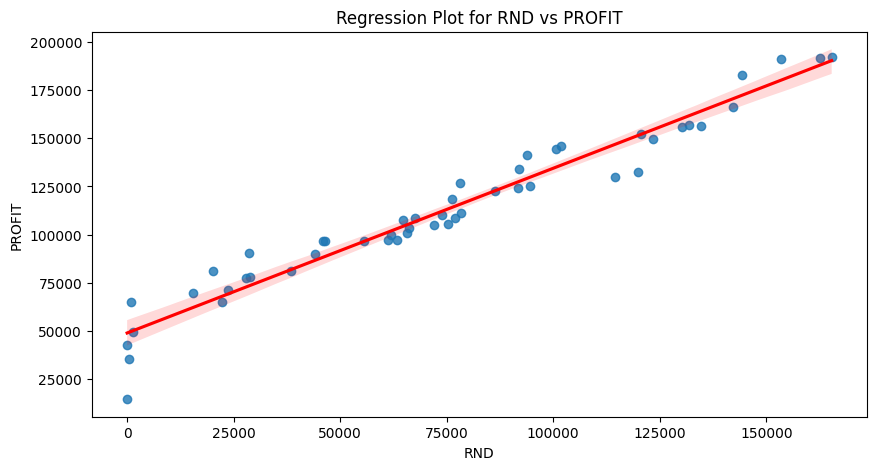

In [21]:
plt.figure(figsize=(10, 5))
sns.regplot(data=df, x="RND", y="PROFIT", line_kws={"color": "red"})
plt.title("Regression Plot for RND vs PROFIT")
plt.show()

In [23]:
model.score(x, y)


0.9465353160804393